<a href="https://colab.research.google.com/github/Carolinadmz/Portafolio/blob/main/Ejercicios/1%2C_1_DiabetesKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerías
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split #dividir la base
from sklearn.preprocessing import MinMaxScaler #normaización/rango
import numpy as np #matrices
import matplotlib.pyplot as plt #graficar

In [2]:
#Cargar el conjunto de datos
dataset = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/2025-IA/pima-indians-diabetes.data', delimiter=',')

In [3]:
dataset.shape

(768, 9)

In [4]:
#Separar los datos en entrada y etiqueta deseadas
X = dataset[:,0:8] #la ultima columna no la toma
y = dataset[:,8] # los :, es que tome todos los datos

In [5]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [6]:
X.shape

(768, 8)

In [7]:
y.shape

(768,)

In [8]:
#Normalizar los datos
scaler = MinMaxScaler(feature_range=(-1,1))
X = scaler.fit_transform(X)

In [9]:
X

array([[-0.29411765,  0.48743719,  0.18032787, ...,  0.00149031,
        -0.53116994, -0.03333333],
       [-0.88235294, -0.14572864,  0.08196721, ..., -0.2071535 ,
        -0.76686593, -0.66666667],
       [-0.05882353,  0.83919598,  0.04918033, ..., -0.30551416,
        -0.49274125, -0.63333333],
       ...,
       [-0.41176471,  0.2160804 ,  0.18032787, ..., -0.21907601,
        -0.85738685, -0.7       ],
       [-0.88235294,  0.26633166, -0.01639344, ..., -0.10283159,
        -0.76857387, -0.13333333],
       [-0.88235294, -0.06532663,  0.14754098, ..., -0.09388972,
        -0.79760888, -0.93333333]])

In [10]:
#Dividir el conjunto de datos al 50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [11]:
X_train.shape

(384, 8)

In [12]:
y_train.shape

(384,)

In [13]:
#Crear MLP 8/12/6/1
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='tanh'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [15]:
#Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6718 - loss: 0.6536 - val_accuracy: 0.6276 - val_loss: 0.5613
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6964 - loss: 0.4336 - val_accuracy: 0.6276 - val_loss: 0.4229
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6868 - loss: 0.3388 - val_accuracy: 0.6276 - val_loss: 0.3435
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6862 - loss: 0.2823 - val_accuracy: 0.6276 - val_loss: 0.2962
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6603 - loss: 0.2622 - val_accuracy: 0.6250 - val_loss: 0.2688
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6639 - loss: 0.2454 - val_accuracy: 0.6224 - val_loss: 0.2524
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6910 - loss: 0.2259 - val_accuracy: 0.6250 - val_loss: 0.2418
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6983 - loss: 0.2178 - val_accuracy: 0.6354 - 

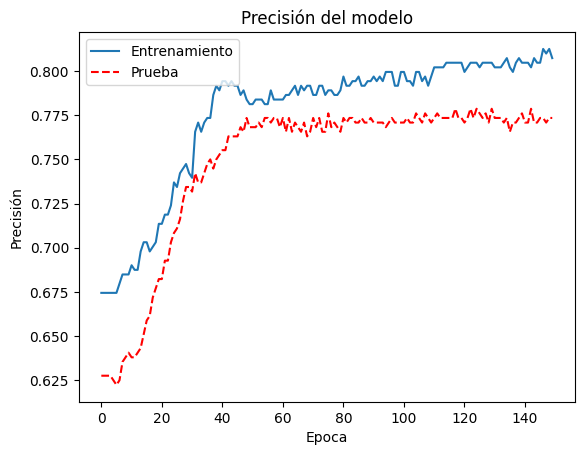

In [16]:
#Gráfica de desempeño
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.savefig('precisionDiabetesKeras.png', dpi=300)
plt.show()


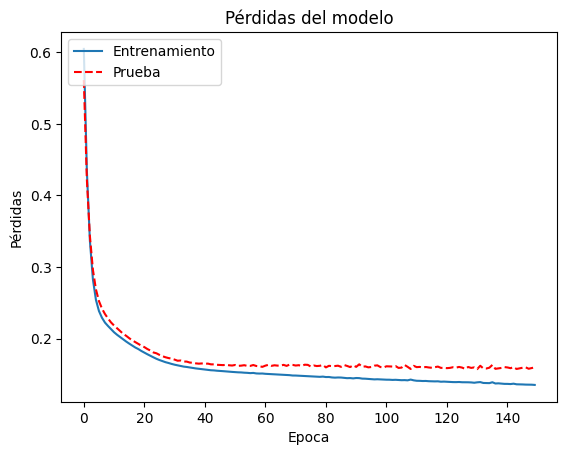

In [17]:
#Gráfica para loss y val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Pérdidas del modelo')
plt.ylabel('Pérdidas')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.savefig('perdidasDiabetesKeras.png', dpi=300)
plt.show()


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

Nos indica que es una red neuronal multicapa (MLP)
El modelo tiene tres capas densas (Dense): la primera capa tiene 12 neuronas con 108 parámetros ((8+1) * 12), la segunda capa tiene 6 neuronas con 78 parámetros ((12+1) * 6), y la última capa tiene 1 neurona con 7 parámetros ((6+1) * 1).

El total de parámetros del modelo es 581, de los cuales 193 son entrenables y 0 no entrenables. El optimizador tiene 388 parámetros. Es una red neuronal multicapa (MLP) con 8 entradas, dos capas ocultas y una salida.